In [1]:
print("Hello world")

Hello world


In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words=open('names.txt','r').read().splitlines()
words[:8]


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# Build the vocabulary of chars mappings to/ from intergers
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [57]:
# build the dataset

block_size=3 # context length: how many characters do we take to predict the next one?
X,Y=[],[]
for w in words:
    # print(w)
    context =[0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), "----->",itos[ix])
        context=context[1:]+ [ix] # crop and append
    
X=torch.tensor(X)
Y=torch.tensor(Y)

In [58]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [171]:
# build the dataset

def build_dataset(words):
    block_size=3
    X,Y=[],[]
    for w in words:
        # print(w)
        context =[0]*block_size
        for ch in w + '.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), "----->",itos[ix])
            context=context[1:]+ [ix] # crop and append
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random 
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])



    

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [9]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [10]:
C=torch.randn((27,2))

In [11]:
C[5]

tensor([0.5876, 0.7965])

In [12]:
F.one_hot(torch.tensor(5),num_classes=27).float()  @ C

tensor([0.5876, 0.7965])

In [13]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [14]:
W1=torch.randn((6,100))
b1=torch.randn(100)


In [18]:
h=torch.tanh(emb.view(-1,6) @ W1 +b1)

In [19]:
h

tensor([[-0.9638,  0.9983, -0.9986,  ..., -0.9995,  0.9844, -0.3664],
        [ 0.6229,  0.9962,  0.9584,  ..., -0.3205,  0.9998,  0.4118],
        [-0.9994,  0.8236, -0.9998,  ..., -0.9988,  0.9051, -0.6889],
        ...,
        [-0.9997,  0.8978,  0.9999,  ...,  0.9850,  1.0000,  0.8202],
        [-0.9906,  0.8517,  0.9999,  ...,  0.9963,  1.0000,  0.9794],
        [-1.0000,  0.1469, -0.7554,  ..., -0.1882,  0.9982,  0.8795]])

In [20]:
h.shape

torch.Size([32, 100])

In [21]:
w2=torch.randn((100,27))
b2=torch.randn(27)

In [22]:
logits=h@w2 +b2
logits.shape

torch.Size([32, 27])

In [23]:
counts=logits.exp()

In [26]:
prob=counts/counts.sum(1,keepdims=True)

In [27]:
prob.shape

torch.Size([32, 27])

In [34]:
-prob[torch.arange(32), Y].log().mean()

tensor(14.3181)

In [35]:
# now everything combined

In [172]:
Xtr.shape,Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [264]:
g=torch.Generator().manual_seed(2147483647) # for reproducibility
c=torch.randn((27,10),generator=g)
W1=torch.randn((30,200),generator=g)
b1=torch.randn(200,generator=g)
w2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[c,W1,b1,w2,b2]


In [265]:
sum(p.nelement() for p in parameters)

11897

In [266]:
for p in parameters:
    p.requires_grad=True

In [267]:
lri=[]
lossi=[]
stepi=[]

In [268]:

for i in range(200000):
    # minibatch construct
    ix=torch.randint(0,Xtr.shape[0],(32,))

    # foward pass
    emb=c[Xtr[ix]] # (32,3,2)
    h=torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
    logits=h @ w2 + b2 # (32,27)
    loss=F.cross_entropy(logits,Ytr[ix]) # the biggest issue with using the logits.exp() it gets an inf once the numbers are quite large making it really hard to get the probabilities since they majorly turn to zero
    
    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    
    # update
    # lr=lrs[i]
    lr=0.1 if i <100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
# print(loss.item())

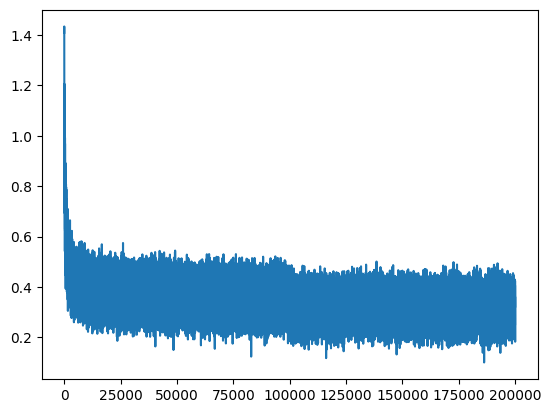

In [269]:
plt.plot(stepi,lossi)

In [270]:
print(loss.item())

2.278904676437378


In [271]:
emb=c[Xtr] # (32,3,2)
h=torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
logits=h @ w2 + b2 # (32,27)
loss=F.cross_entropy(logits,Ytr)
loss.item()

2.132894277572632

In [ ]:
emb=c[Xdev] # (32,3,2)
h=torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
logits=h @ w2 + b2 # (32,27)
loss=F.cross_entropy(logits,Ydev)
loss.item()

2.1678872108459473

In [262]:
# training split, dev/validation spily , test split
# 80%, 10% ,10%


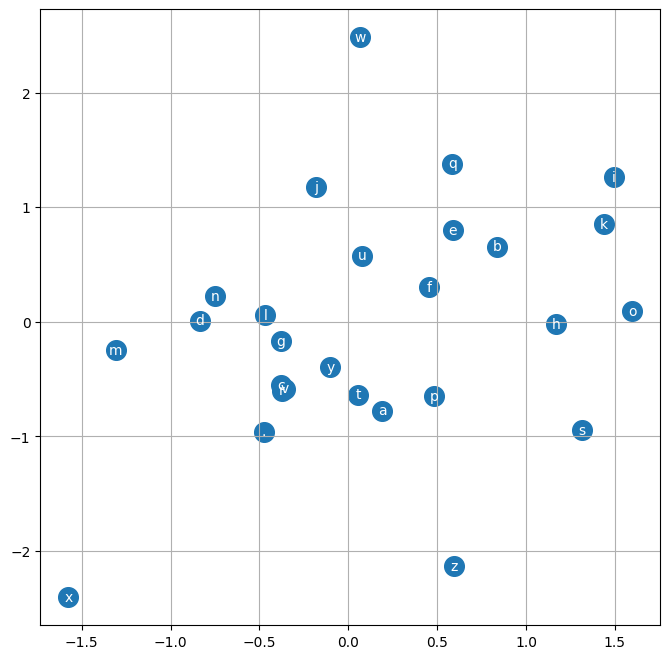

In [263]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid('minor')


In [278]:
# # sampling from the model 
# g = torch.Generator().manual_seed(2147483647)

# for _ in range(20):
#     out=[]
#     context=[0]
#     while True:
#         emb=C[torch.tensor([context])]
#         h = torch.tanh(emb.view(-1,30) @ W1 + b1)
#         logits=h @ w2 + b2
#         probs=F.softmax(logits,dim=1)
#         ix=torch.multinomial(probs, num_samples=1, generator=g).item()
#         context=context[1:]+[ix]
#         out.append(ix)
#         if ix == 0:
#             break
#         print(''.join(itos[i] for i in out))

In [15]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [16]:
torch.cat(torch.unbind(emb,1),1)

tensor([[-0.4533,  2.0040, -0.4533,  2.0040, -0.4533,  2.0040],
        [-0.4533,  2.0040, -0.4533,  2.0040, -0.9476,  0.4620],
        [-0.4533,  2.0040, -0.9476,  0.4620, -0.5889, -0.4160],
        [-0.9476,  0.4620, -0.5889, -0.4160, -0.5889, -0.4160],
        [-0.5889, -0.4160, -0.5889, -0.4160, -0.3506, -1.4869],
        [-0.4533,  2.0040, -0.4533,  2.0040, -0.4533,  2.0040],
        [-0.4533,  2.0040, -0.4533,  2.0040,  0.7741,  0.5005],
        [-0.4533,  2.0040,  0.7741,  0.5005, -0.9449, -1.3606],
        [ 0.7741,  0.5005, -0.9449, -1.3606,  0.1398, -2.8138],
        [-0.9449, -1.3606,  0.1398, -2.8138, -0.7840,  0.5508],
        [ 0.1398, -2.8138, -0.7840,  0.5508,  0.1398, -2.8138],
        [-0.7840,  0.5508,  0.1398, -2.8138, -0.3506, -1.4869],
        [-0.4533,  2.0040, -0.4533,  2.0040, -0.4533,  2.0040],
        [-0.4533,  2.0040, -0.4533,  2.0040, -0.3506, -1.4869],
        [-0.4533,  2.0040, -0.3506, -1.4869, -0.7840,  0.5508],
        [-0.3506, -1.4869, -0.7840,  0.5

In [17]:
a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [18]:
a.shape

torch.Size([18])

In [19]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [22]:
a.storage()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15724\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]